In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

!pip install IPython
from IPython.display import Image

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('./train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'number6')

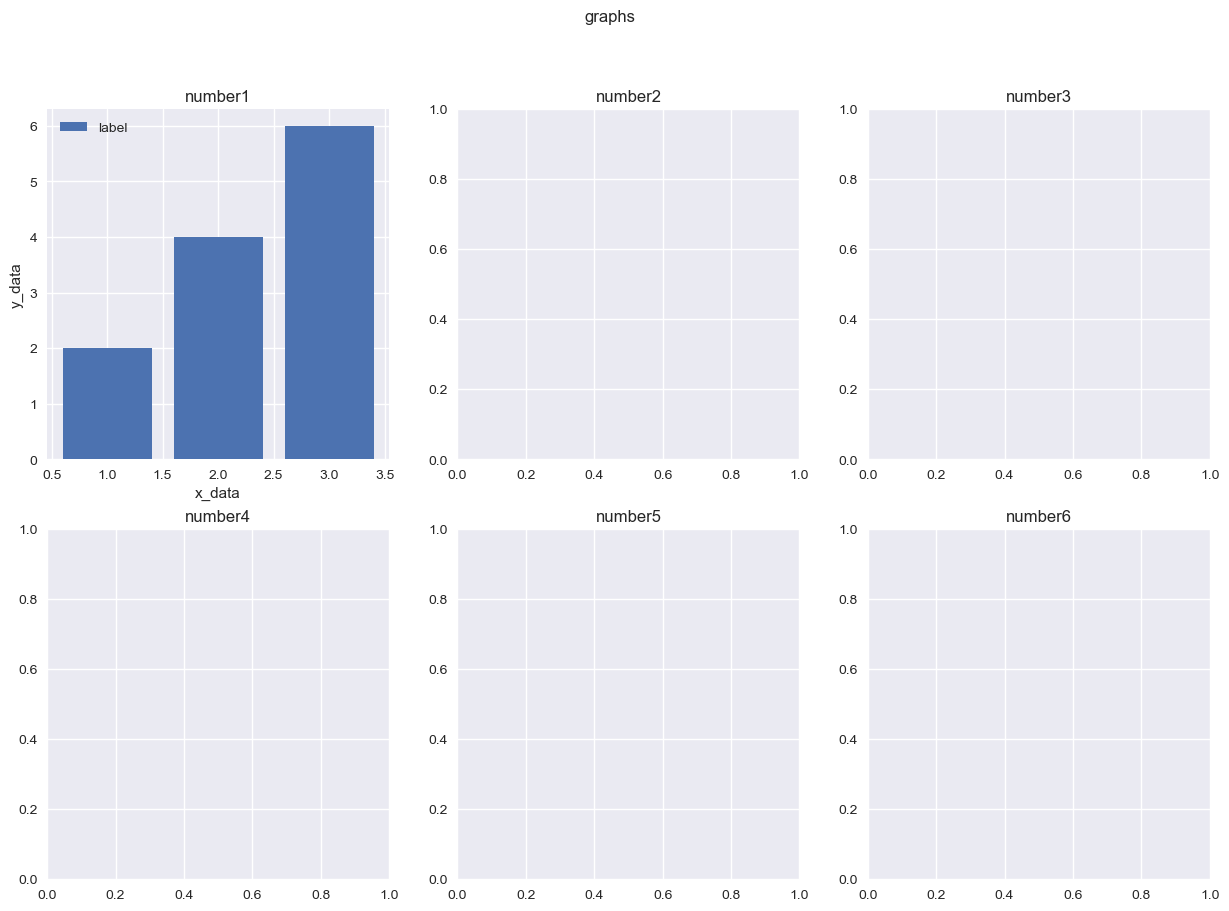

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

x=[1,2,3]
y=[2,4,6]
fig, ax = plt.subplots(2,3, figsize=(15,10))
fig.suptitle('graphs')

ax[0,0].bar(x, y, label='label')
ax[0,0].set_title('number1')
ax[0,0].legend() #범례설정
ax[0,0].set(xlabel='x_data',ylabel='y_data')

ax[0,1].set_title('number2')

ax[0,2].set_title('number3')

ax[1,0].set_title('number4')

ax[1,1].set_title('number5')

ax[1,2].set_title('number6')

<Figure size 800x550 with 0 Axes>

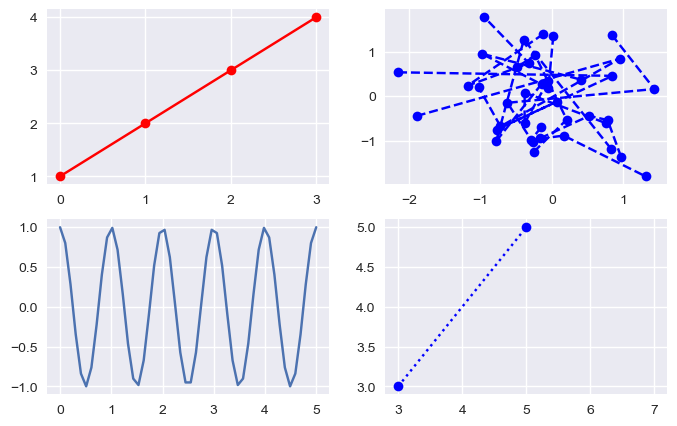

In [8]:
fig = plt.figure()
fig.suptitle('figure sample plots')

fig, ax_lst = plt.subplots(2, 2, figsize=(8,5))

ax_lst[0][0].plot([1,2,3,4], 'ro-')
ax_lst[0][1].plot(np.random.randn(4, 10), np.random.randn(4,10), 'bo--')
ax_lst[1][0].plot(np.linspace(0.0, 5.0), np.cos(2 * np.pi * np.linspace(0.0, 5.0)))
ax_lst[1][1].plot([3,5], [3,5], 'bo:')
ax_lst[1][1].plot([3,7], [5,4], 'kx')
plt.show()

In [9]:
parameters = {
    'axes.titlesize': 25,
    'axes.labelsize': 20,
    'ytick.labelsize': 20
}
plt.rcParams.update(parameters)

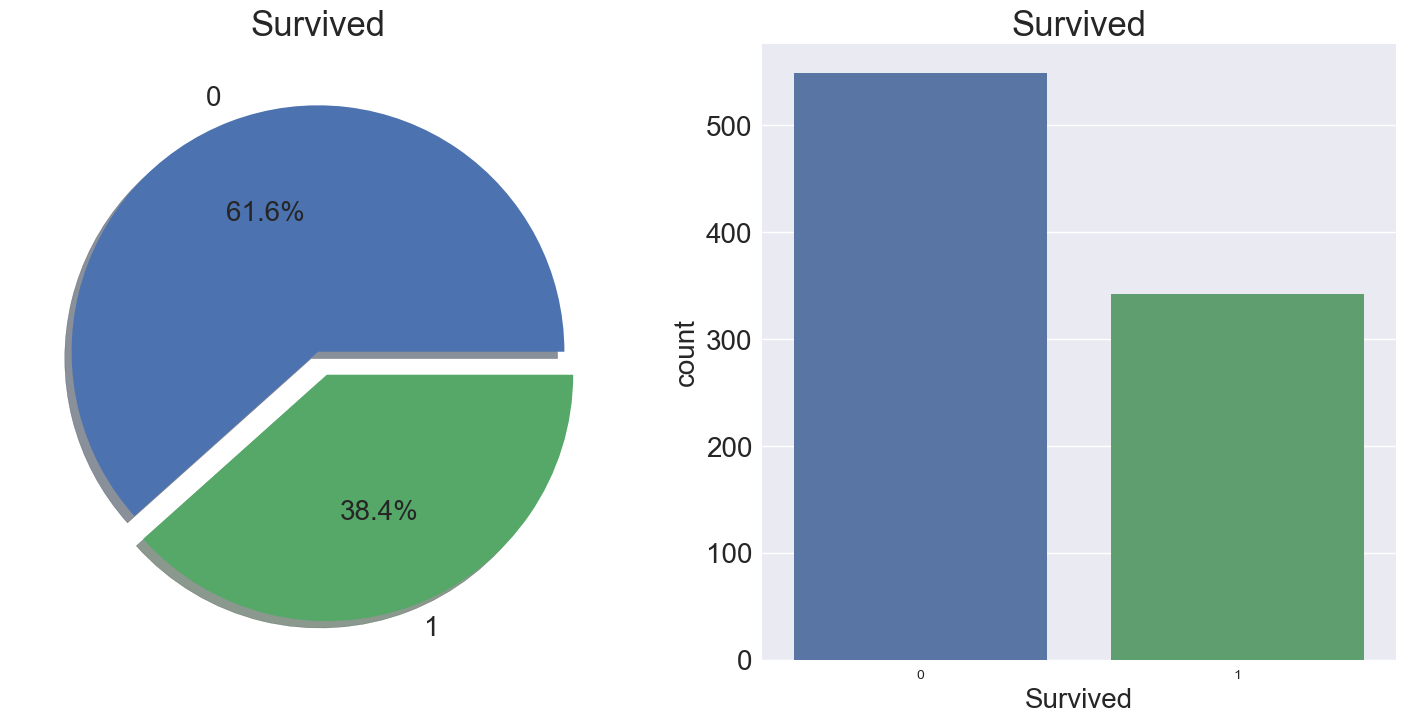

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data['Survived'].value_counts().plot.pie(explode=[0, 0.1],
                                         autopct='%1.1f%%',
                                         ax=ax[0],
                                         shadow=True,
                                         fontsize=20)
ax[0].set_title('Survived') 
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [12]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

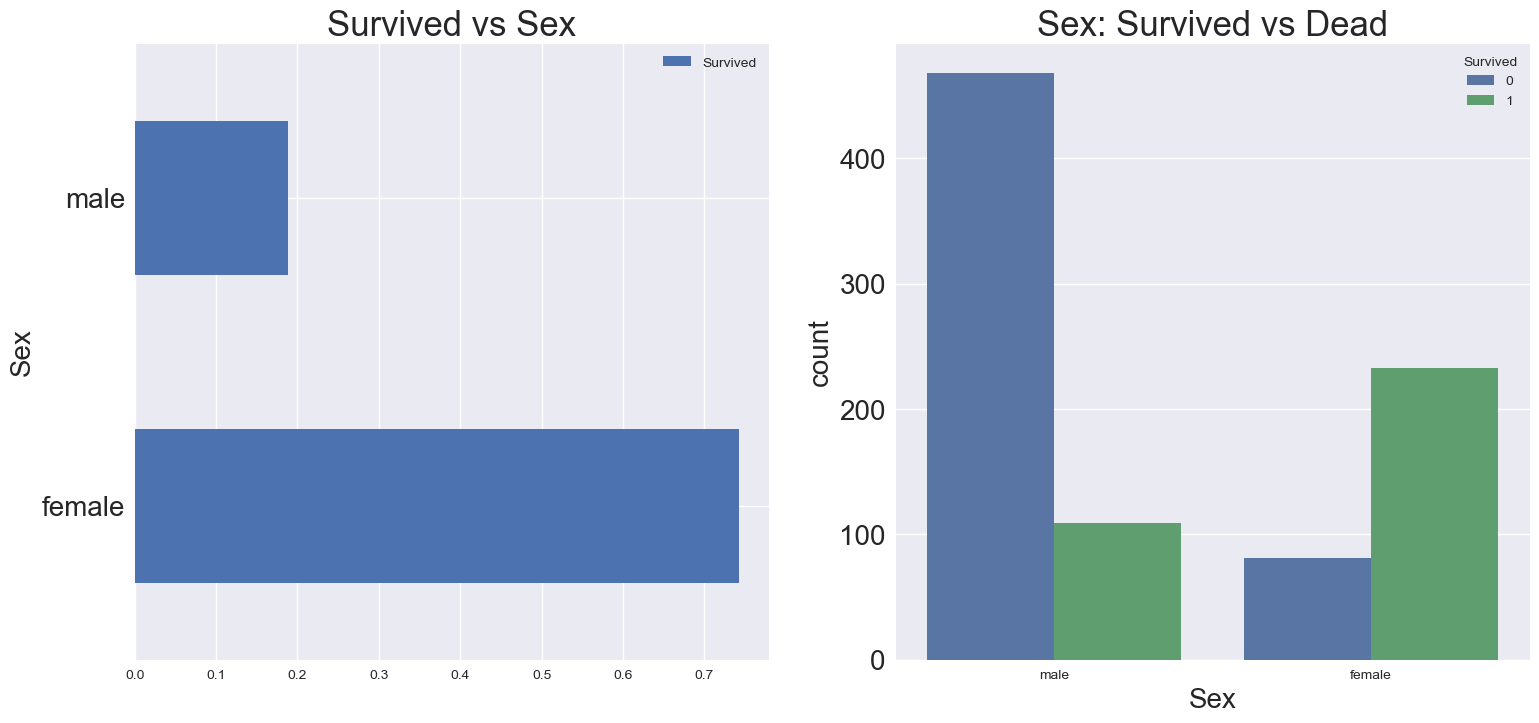

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.barh(ax=ax[0]) 
ax[0].set_title('Survived vs Sex') 

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

In [14]:
Image("1234.jpg.png")

FileNotFoundError: No such file or directory: '1234.jpg.png'

FileNotFoundError: No such file or directory: '1234.jpg.png'

<IPython.core.display.Image object>

In [15]:
pd.crosstab(data.Pclass,
            data.Survived, margins=True).style.background_gradient(
                cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


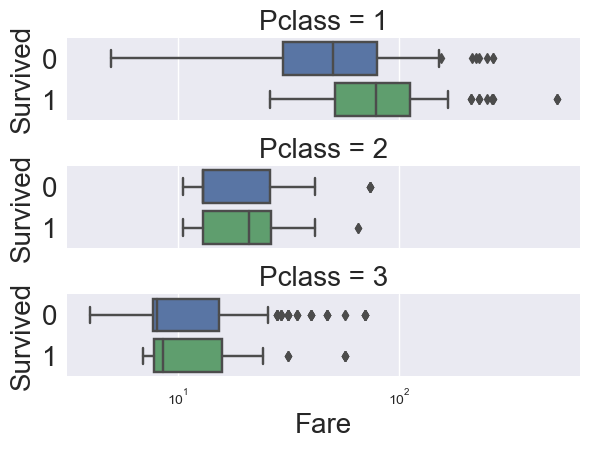

In [16]:
plot = sns.catplot(x="Fare", y="Survived", row="Pclass",
                kind="box", orient="h", height=1.5, aspect=4,
                data=data.query("Fare > 0")) 
plot.set(xscale="log"); 

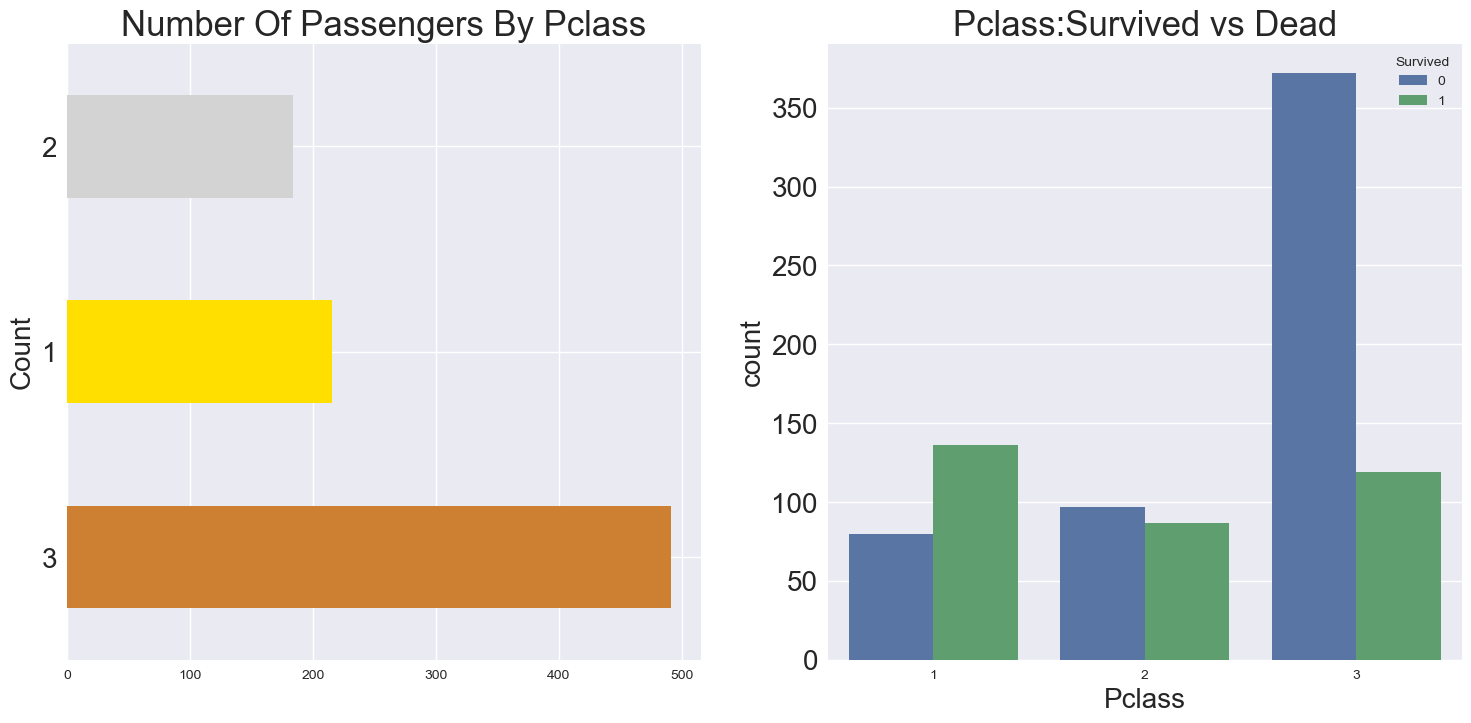

In [18]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data['Pclass'].value_counts().plot.barh(
    color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0]) 
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [19]:
pd.crosstab([data.Sex, data.Survived], data.Pclass,
            margins=True).style.background_gradient(cmap='summer_r')

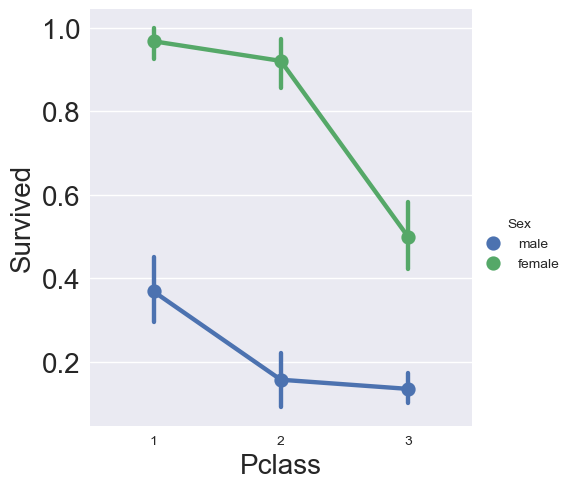

In [20]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

In [22]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years') 
print('Youngest Passenger was of:', data['Age'].min(), 'Years') 
print('Average Age on the ship:', data['Age'].mean(), 'Years') 

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


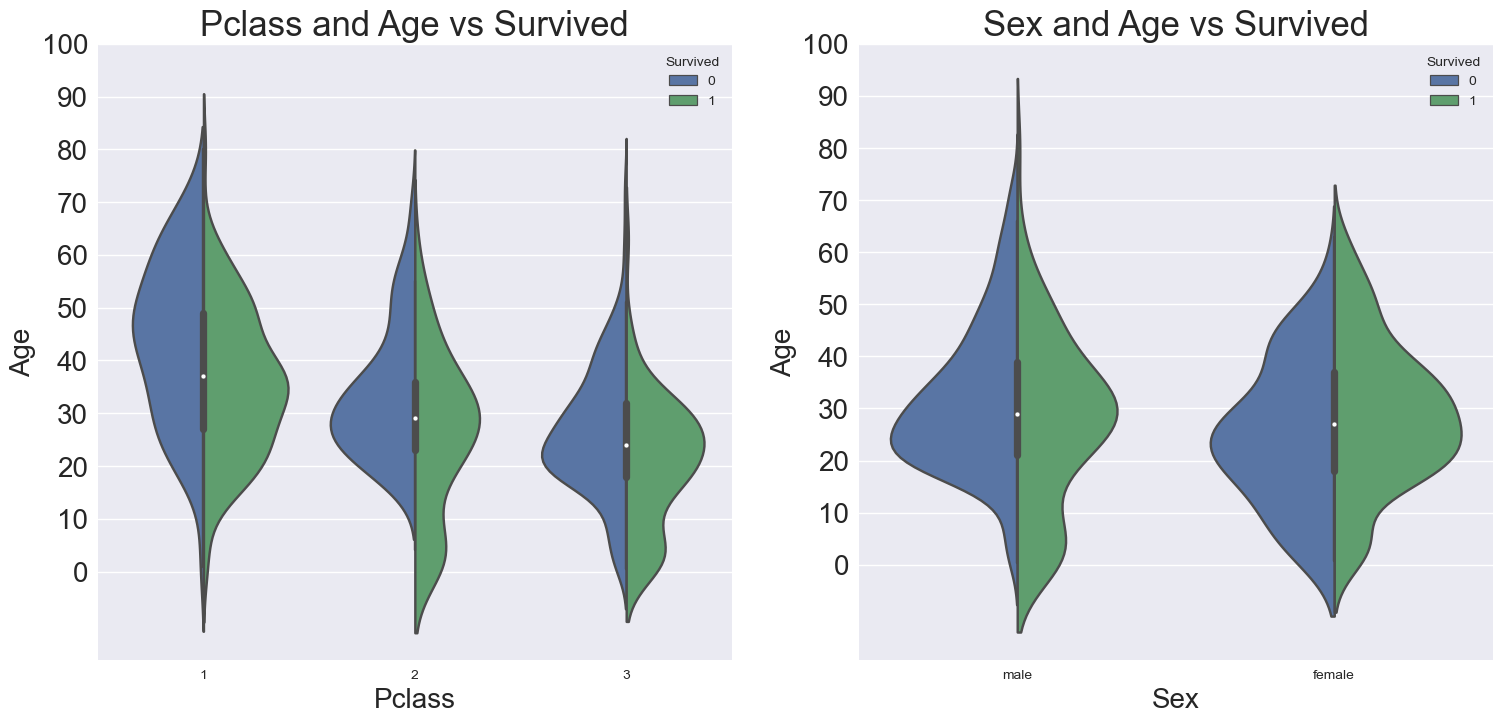

In [23]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot('Pclass',
               'Age',
               hue='Survived',
               data=data,
               split=True, 
               ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [24]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [25]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(
    cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [26]:
data['Initial'].replace([
    'Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col',
    'Rev', 'Capt', 'Sir', 'Don'
], [
    'Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other',
    'Other', 'Mr', 'Mr', 'Mr'
],
                        inplace=True)

In [27]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [28]:
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'), 'Age'] = 46

In [29]:
data.Age.isnull().any()

False

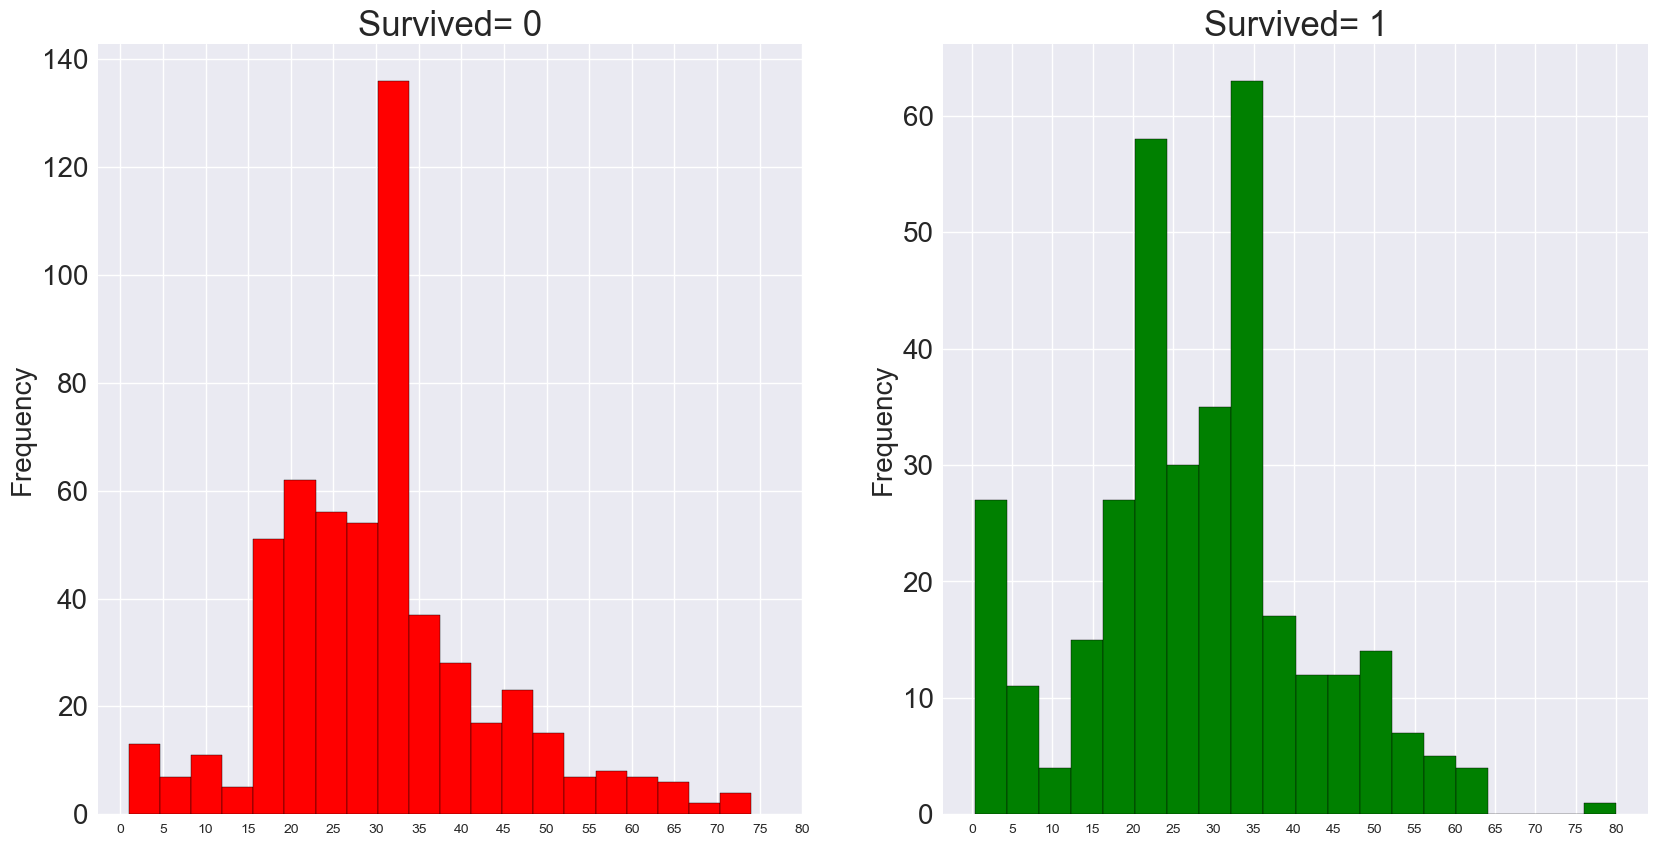

In [30]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

data[data['Survived'] == 0].Age.plot.hist(ax=ax[0],
                                          bins=20,
                                          edgecolor='black',
                                          color='red')
ax[0].set_title('Survived= 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived'] == 1].Age.plot.hist(ax=ax[1],
                                          color='green',
                                          bins=20,
                                          edgecolor='black')
ax[1].set_title('Survived= 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

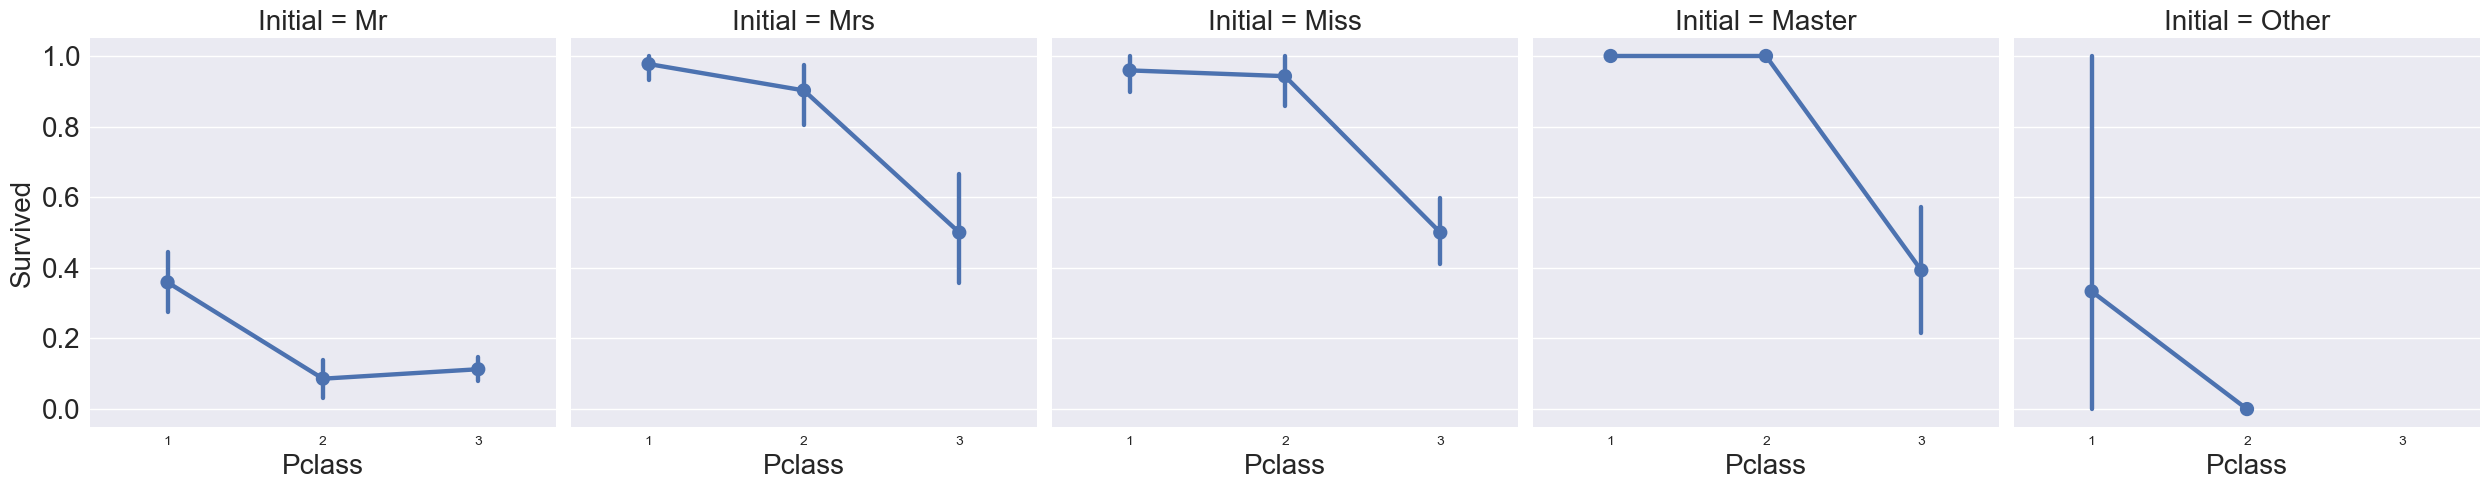

In [31]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

In [32]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived],
            margins=True).style.background_gradient(cmap='summer_r')

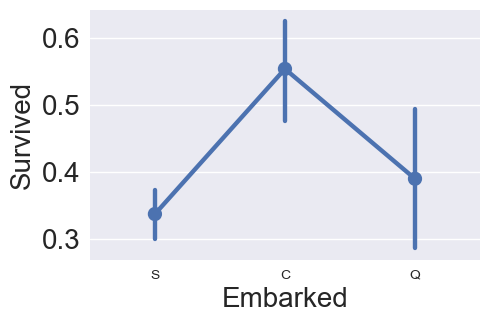

In [34]:
sns.factorplot('Embarked', 'Survived', data=data) 
fig = plt.gcf() 
fig.set_size_inches(5, 3) 
plt.show()

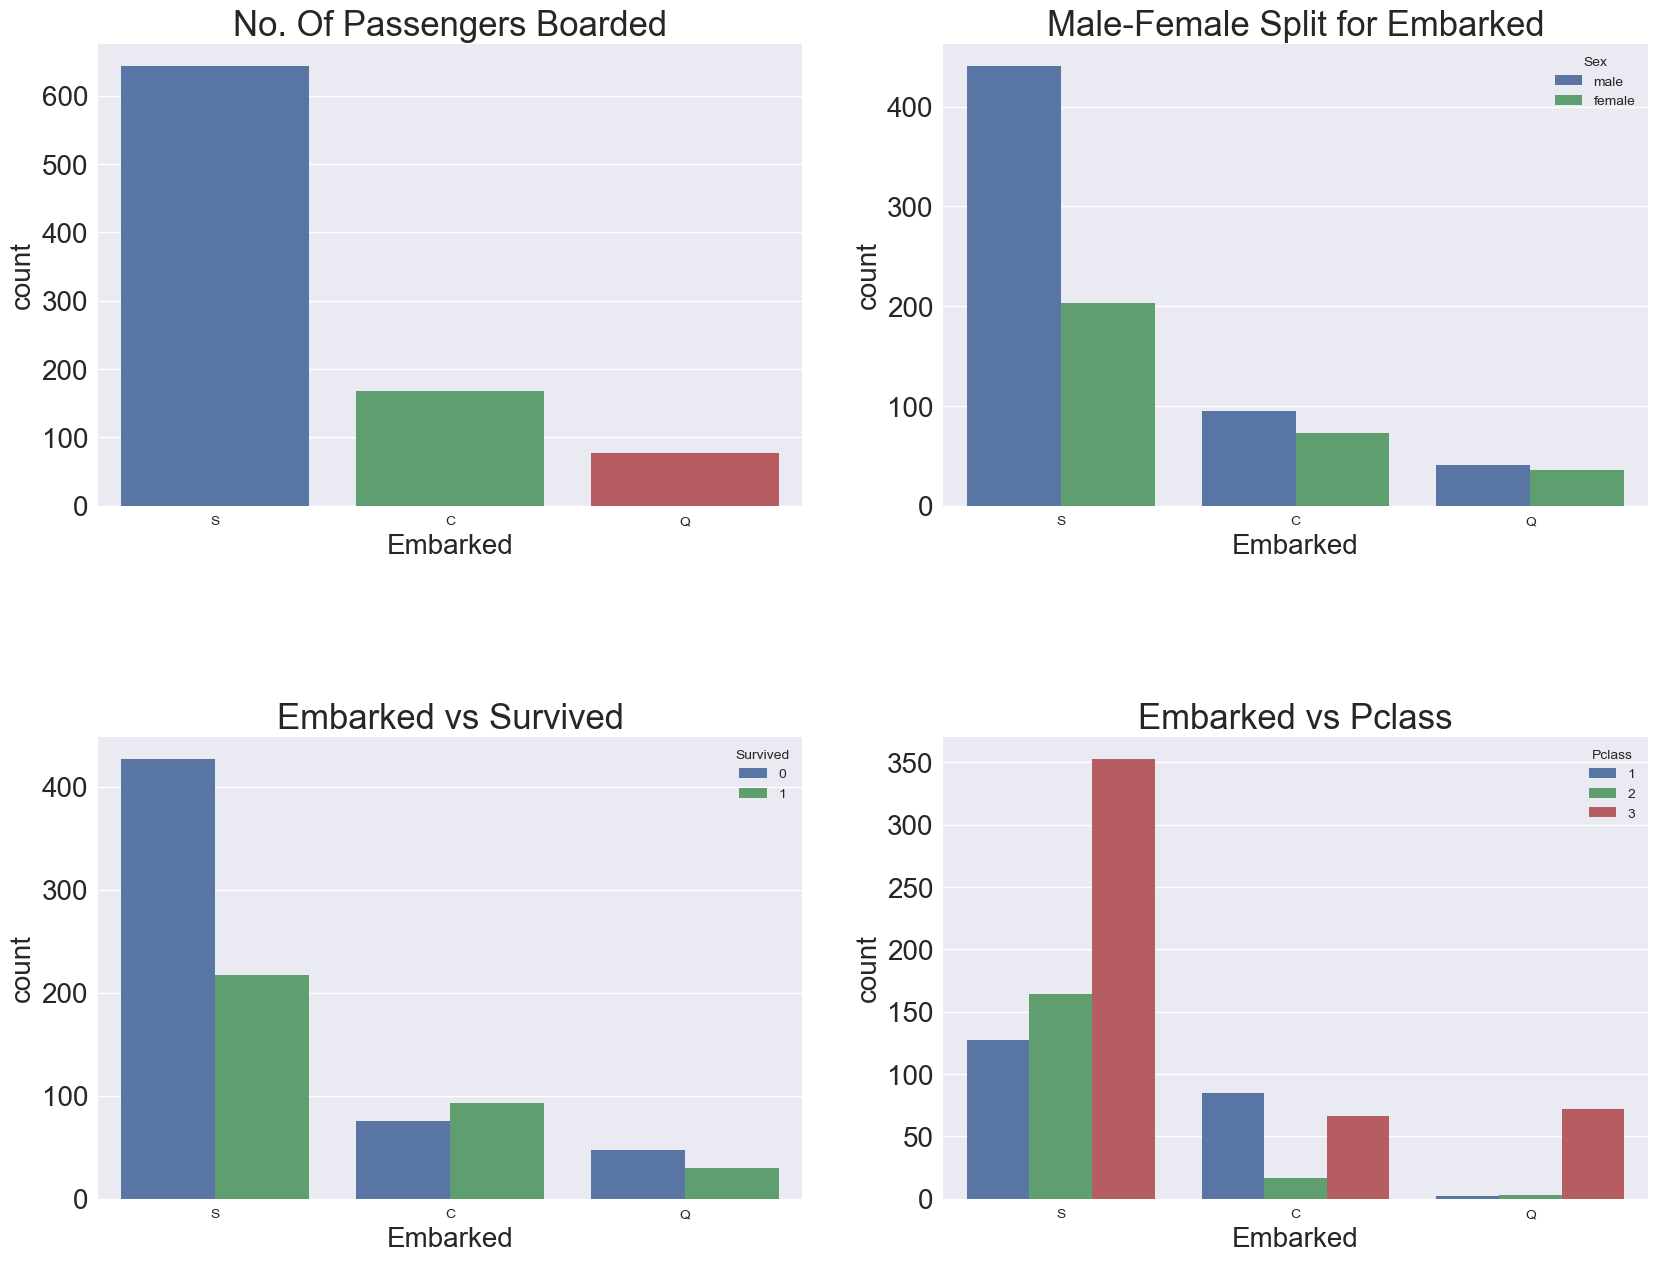

In [35]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))


sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

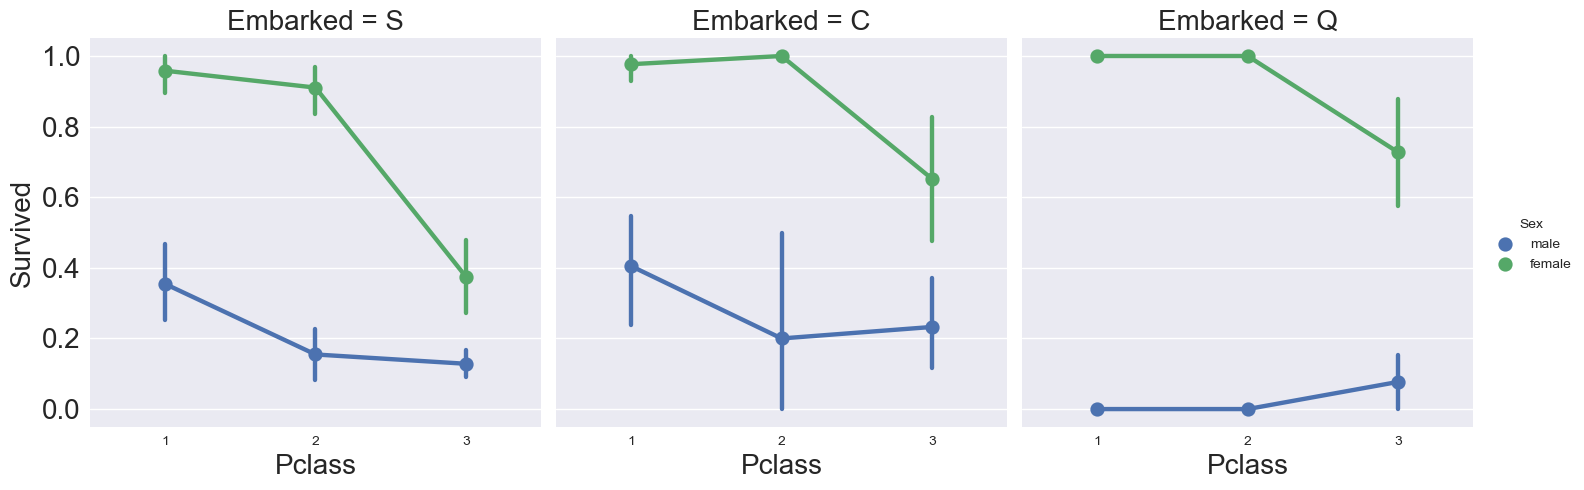

In [36]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

In [37]:
data['Embarked'].fillna('S', inplace=True)

In [38]:
data.Embarked.isnull().any()

False

In [39]:
pd.crosstab([data.SibSp],
            data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


Text(0.5, 1.0, 'SibSp vs Survived')

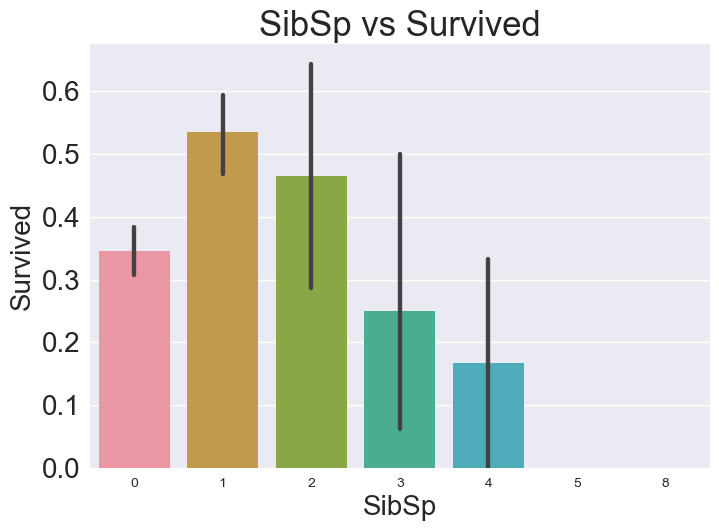

In [40]:
sns.barplot('SibSp', 'Survived', data=data)
plt.title('SibSp vs Survived')

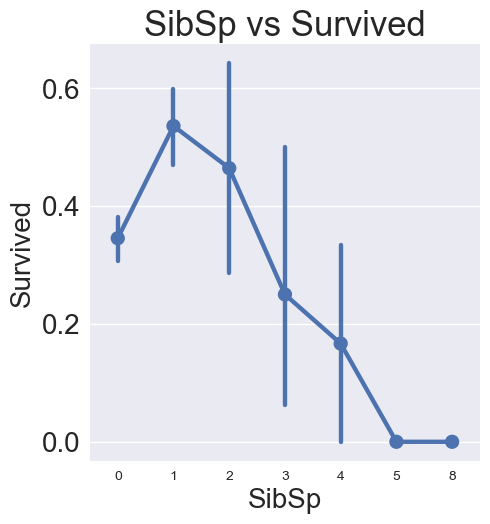

In [41]:
sns.factorplot('SibSp', 'Survived', data=data)
plt.title('SibSp vs Survived')
plt.show()

In [42]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [43]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


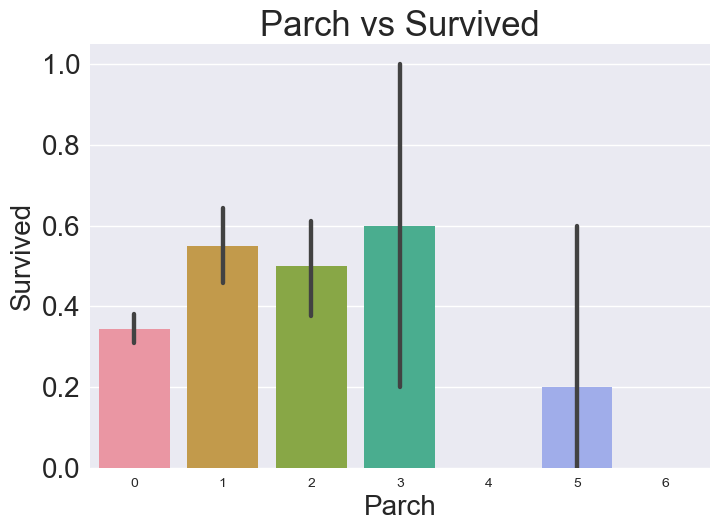

In [44]:
sns.barplot('Parch', 'Survived', data=data)
plt.title('Parch vs Survived')
plt.show()

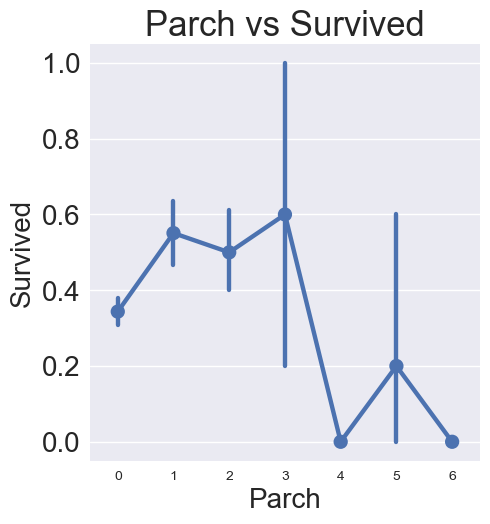

In [45]:
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
plt.title('Parch vs Survived')
plt.show()

In [46]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


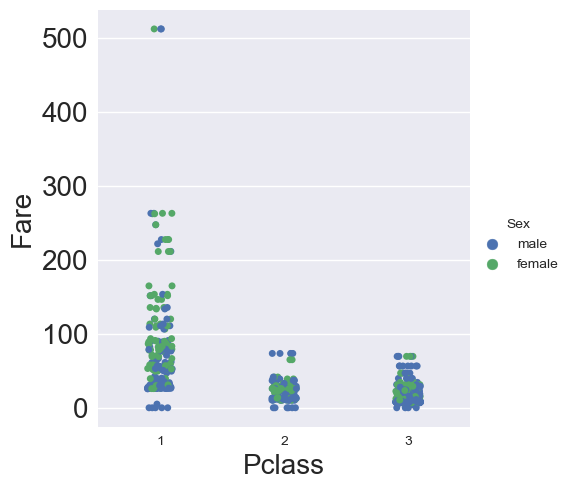

In [47]:
sns.catplot(x='Pclass', y='Fare', hue='Sex', data=data)

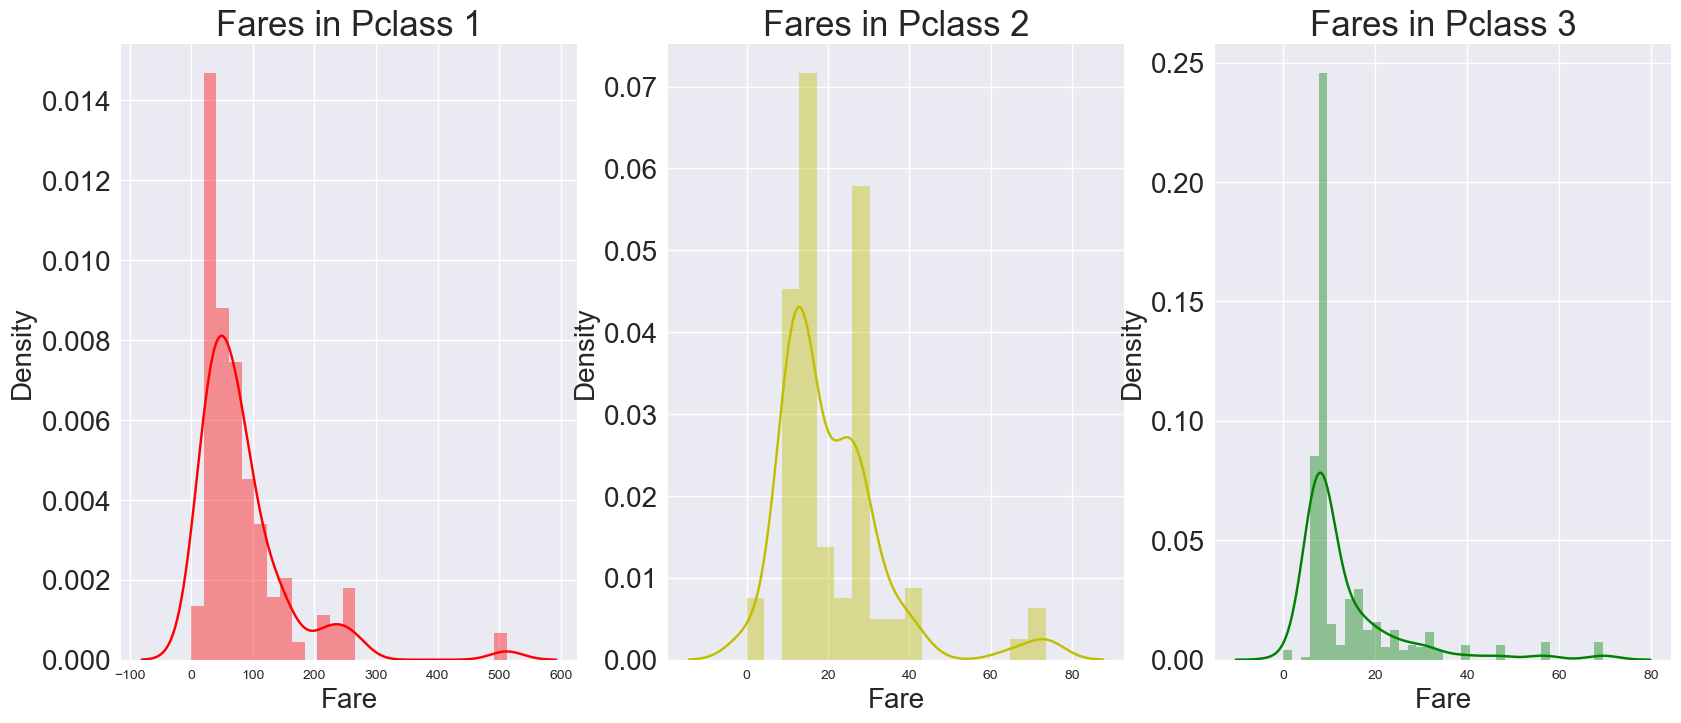

In [48]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.distplot(data[data['Pclass'] == 1].Fare, ax=ax[0], color='r')
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass'] == 2].Fare, ax=ax[1], color='y')
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass'] == 3].Fare, ax=ax[2], color='g')
ax[2].set_title('Fares in Pclass 3')

plt.show()

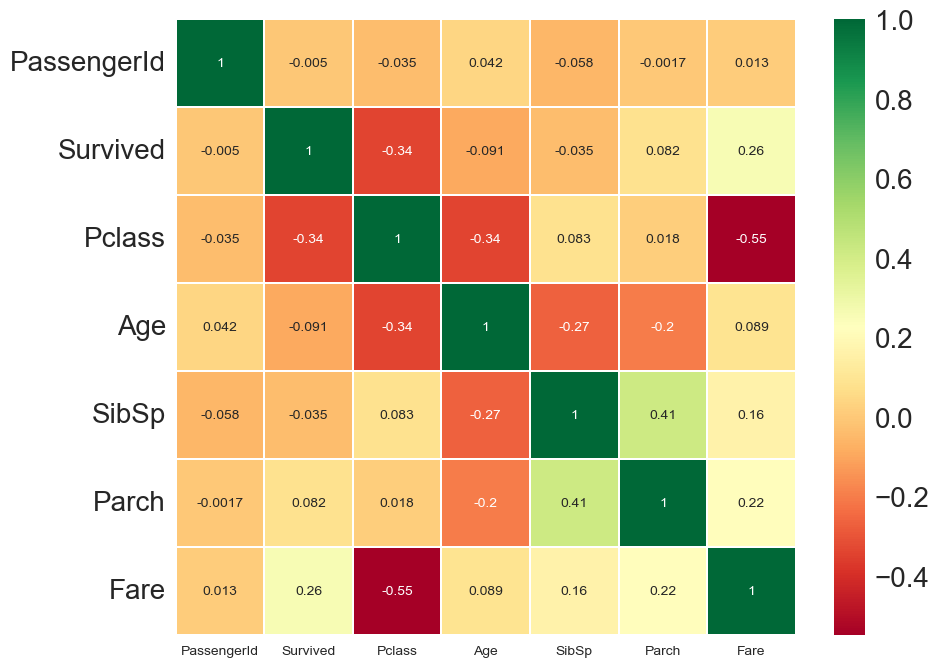

In [49]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) 
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

In [50]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [51]:
data['Age_band'].value_counts().to_frame().style.background_gradient(
    cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


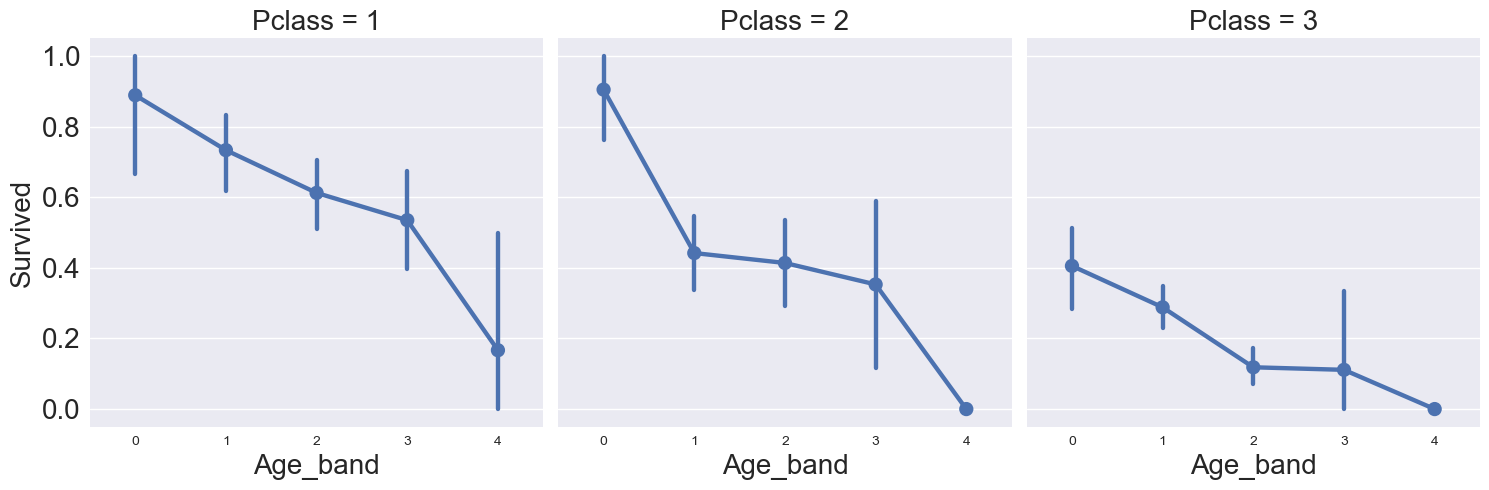

In [52]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

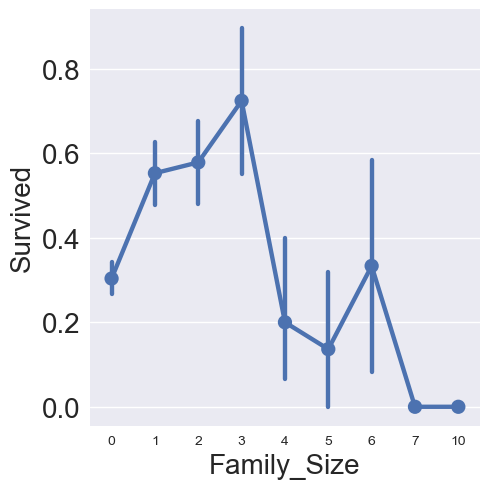

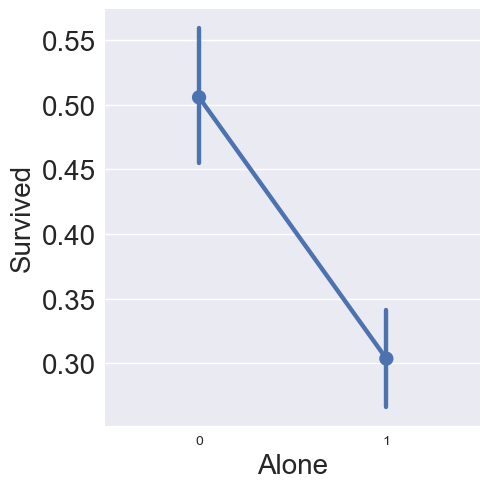

In [53]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']  
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1  

sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.show()

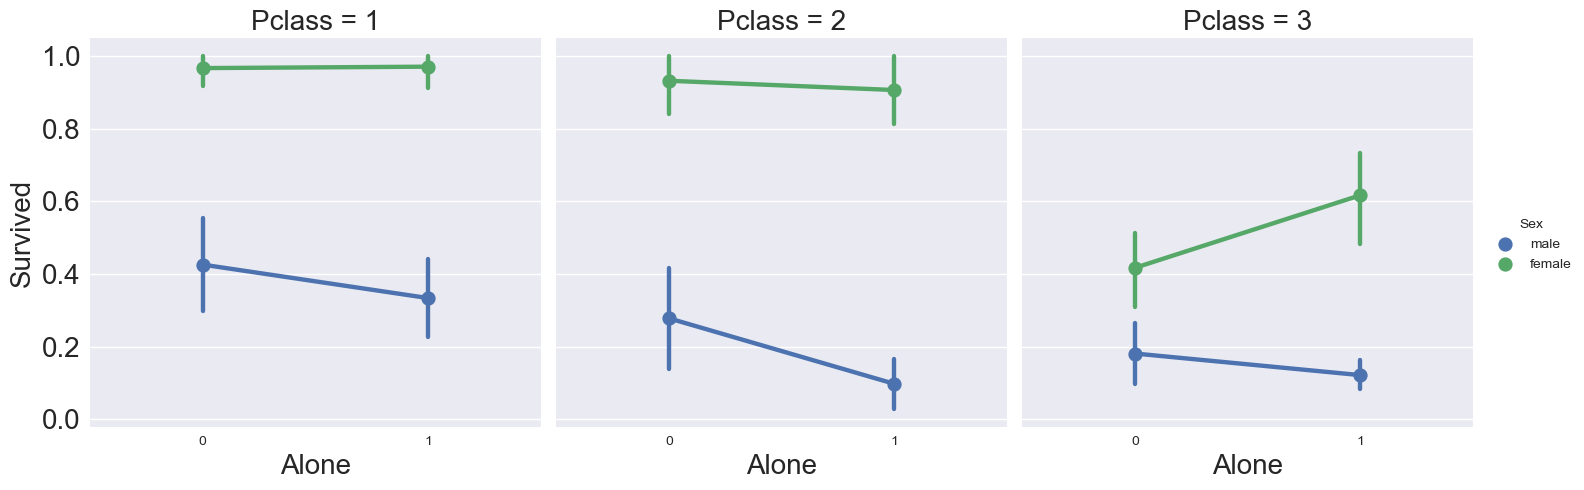

In [54]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

In [55]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4) 
data.groupby([
    'Fare_Range'
])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [56]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat'] = 3

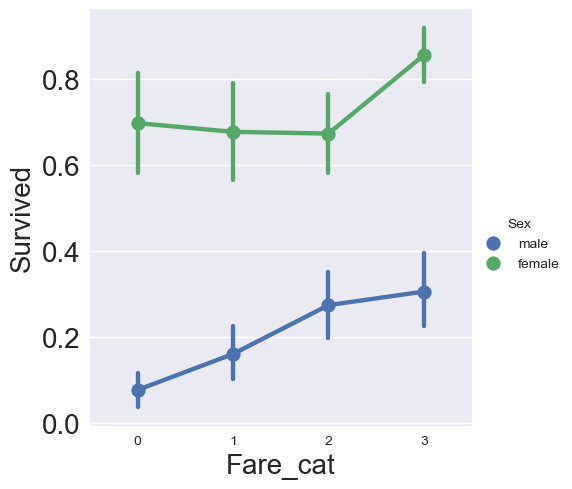

In [57]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

In [58]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'],
                        [0, 1, 2, 3, 4],
                        inplace=True)

In [59]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Initial', 'Age_band',
       'Family_Size', 'Alone', 'Fare_Range', 'Fare_cat'],
      dtype='object')

In [60]:
df=pd.DataFrame(np.random.randn(10,4).cumsum(axis=0), columns=['A','B','C','D'], index=np.arange(0,100,10))
df

,A,B,C,D
0,0.486109,0.317514,-0.366185,0.732078
10,1.320061,0.536861,-0.290701,-0.044485
20,0.615972,-0.853797,-0.519373,0.729596
30,-0.456508,-0.973859,-3.335659,1.103177
40,0.557316,-0.119393,-0.915702,1.147989
50,1.923039,-1.888366,-0.342254,1.839570
60,2.199886,-2.541544,-0.148570,0.992754
70,2.256135,-5.040682,0.151733,1.286816
80,2.381511,-4.157393,-0.205755,0.957096
90,3.255136,-5.148289,-0.571957,-1.227724


<AxesSubplot:>

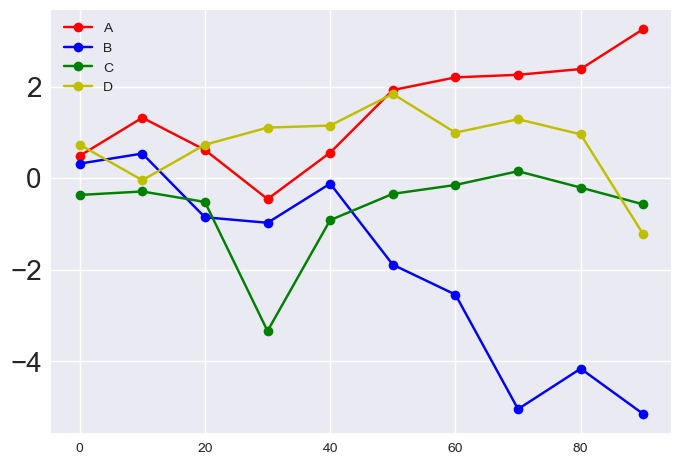

In [61]:
df.plot(marker='o', color=['r','b','g','y'])

In [62]:
iris = sns.load_dataset("iris") 
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


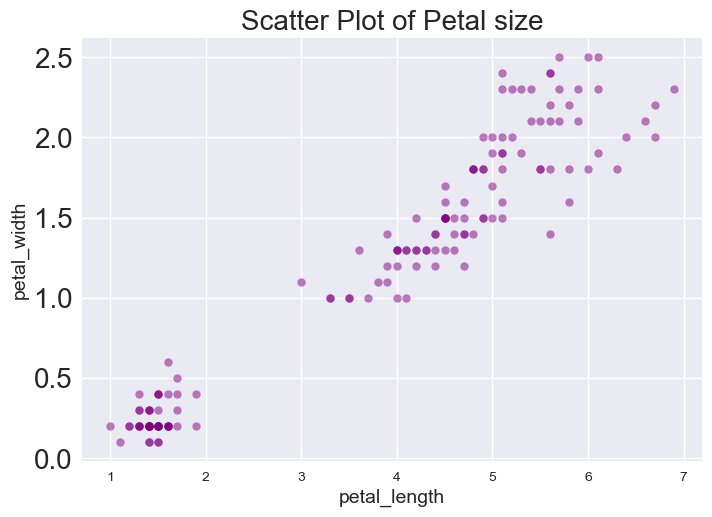

In [63]:
plt.plot('petal_length', 
         'petal_width', 
         data=iris,
         linestyle='none', 
         marker='o', 
         markersize=6,
         color='purple', 
         alpha=0.5)
plt.title('Scatter Plot of Petal size', fontsize=20)
plt.xlabel('petal_length', fontsize=14)
plt.ylabel('petal_width', fontsize=14)
plt.show()

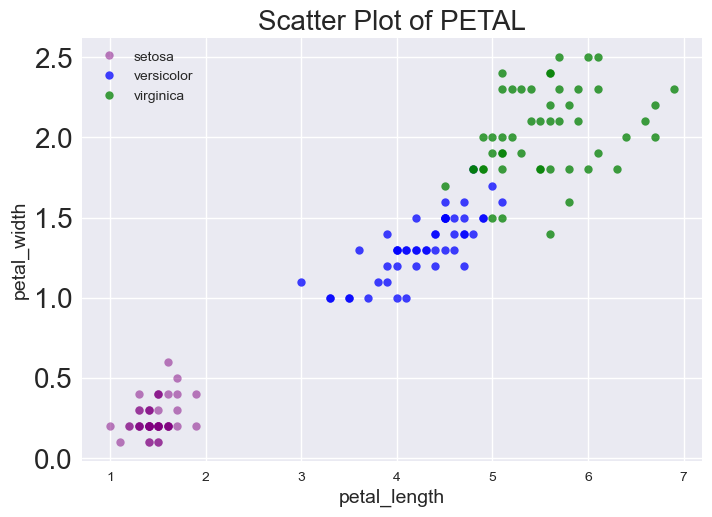

In [64]:
plt.plot('petal_length',  
         'petal_width',  
         data=iris[iris['species']=='setosa'],
         linestyle='none', 
         marker='o', 
         markersize=6,
         color='purple', 
         alpha=0.5)
plt.plot('petal_length',  
         'petal_width',  
         data=iris[iris['species']=='versicolor'],
         linestyle='none', 
         marker='o', 
         markersize=6,
         color='blue', 
         alpha=0.75)
plt.plot('petal_length', 
         'petal_width',  
         data=iris[iris['species']=='virginica'],
         linestyle='none', 
         marker='o', 
         markersize=6,
         color='green', 
         alpha=0.75)
plt.title('Scatter Plot of PETAL', fontsize=20)
plt.xlabel('petal_length', fontsize=14)
plt.ylabel('petal_width', fontsize=14)
plt.legend(['setosa','versicolor', 'virginica'])
plt.show()

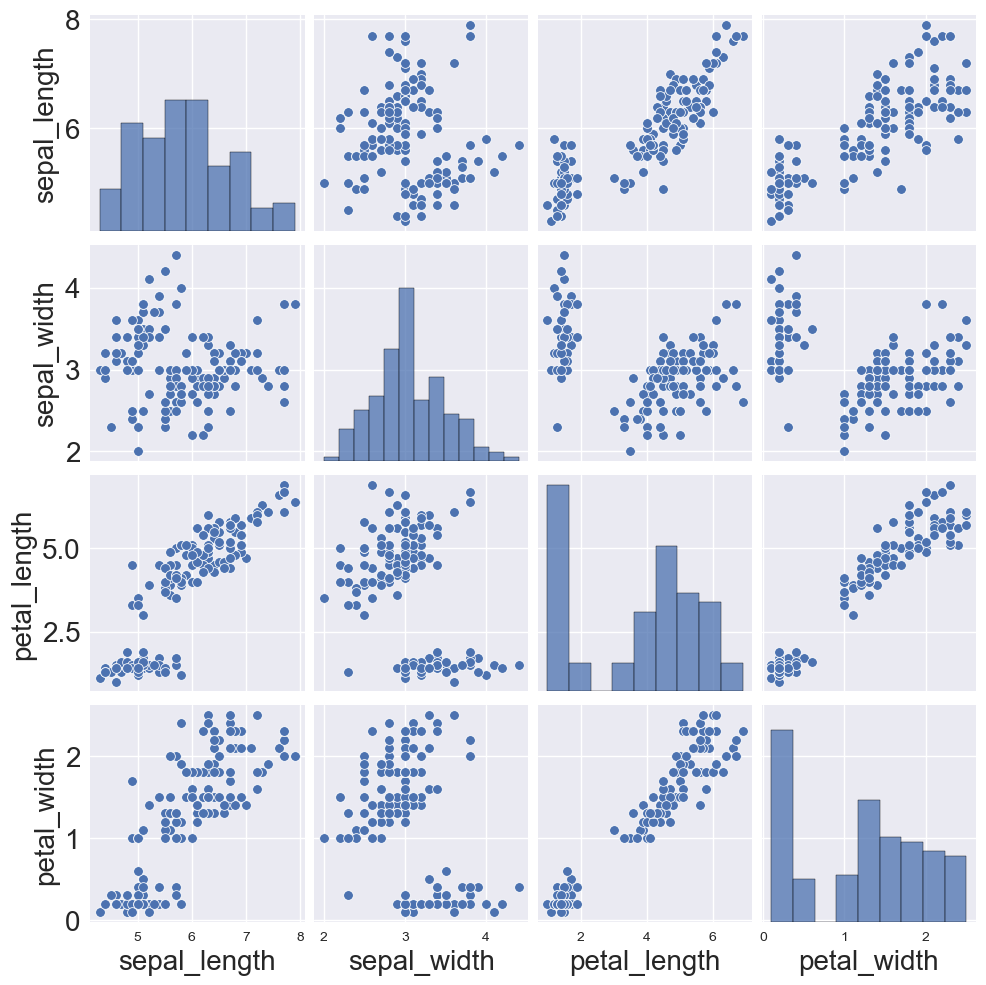

In [65]:
sns.pairplot(iris)

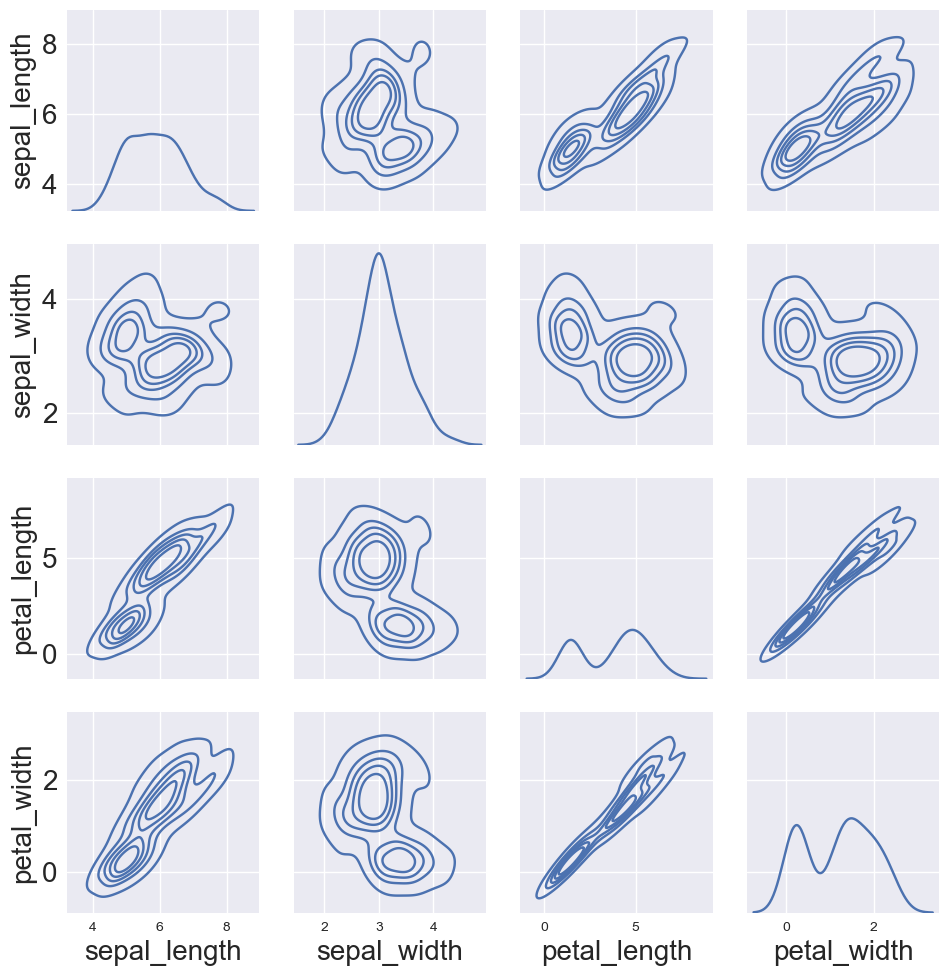

In [66]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

In [67]:
import numpy as np

fish_data= np.column_stack((fish_length, fish_weight))
fish_target= np.concatenate((np.ones(35), np.zeros(14)))
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

NameError: name 'fish_length' is not defined

In [68]:
distances, indexes = kn.kneighbors([[25,150]])

import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')

NameError: name 'kn' is not defined

In [69]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000))
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

NameError: name 'train_input' is not defined

In [70]:
mean=np.mean(train_input, axis=0)
std=np.std(train_input, axis=0)

NameError: name 'train_input' is not defined

In [71]:
print(mean,std)

NameError: name 'mean' is not defined

In [72]:
train_scaled=(train_input-mean)/std

NameError: name 'train_input' is not defined

In [73]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel("length")
plt.ylabel('weight')
print('Oldest Passenger was of:', data['Age'].max(), 'Years') 
print('Youngest Passenger was of:', data['Age'].min(), 'Years') 
print('Average Age on the ship:', data['Age'].mean(), 'Years') 

NameError: name 'train_scaled' is not defined

In [74]:
new=([25,150]-mean)/std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

NameError: name 'mean' is not defined